In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19  
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import mobilenet_v2

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'
test_path = '/content/drive/MyDrive/chest_xray/test'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)                                



# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Early Stopping

In [5]:
callbacks=[
        keras.callbacks.EarlyStopping(patience=2, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=2, verbose=1),]

# Sequential

In [31]:
seq_model = Sequential()
seq_model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
seq_model.add(BatchNormalization())
seq_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
seq_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
seq_model.add(Dropout(0.1))
seq_model.add(BatchNormalization())
seq_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
seq_model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
seq_model.add(BatchNormalization())
seq_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
seq_model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
seq_model.add(Dropout(0.2))
seq_model.add(BatchNormalization())
seq_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
seq_model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
seq_model.add(Dropout(0.2))
seq_model.add(BatchNormalization())
seq_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
seq_model.add(Flatten())
seq_model.add(Dense(units = 128 , activation = 'relu'))
seq_model.add(Dropout(0.2))
seq_model.add(Dense(units = 2 , activation = 'sigmoid'))
seq_model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
seq_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_94 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_95 (Bat  (None, 112, 112, 64)    

In [36]:
sequential_model = seq_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set), callbacks=[callbacks]
)

Epoch 1/20
522/522 [==============================] - 111s 214ms/step - loss: 0.1527 - accuracy: 0.9572 - val_loss: 1.8554 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/20
522/522 [==============================] - 112s 214ms/step - loss: 0.1514 - accuracy: 0.9597 - val_loss: 2.9754 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/20
522/522 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9636Restoring model weights from the end of the best epoch: 1.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
522/522 [==============================] - 111s 213ms/step - loss: 0.1378 - accuracy: 0.9636 - val_loss: 4.3262 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 00003: early stopping


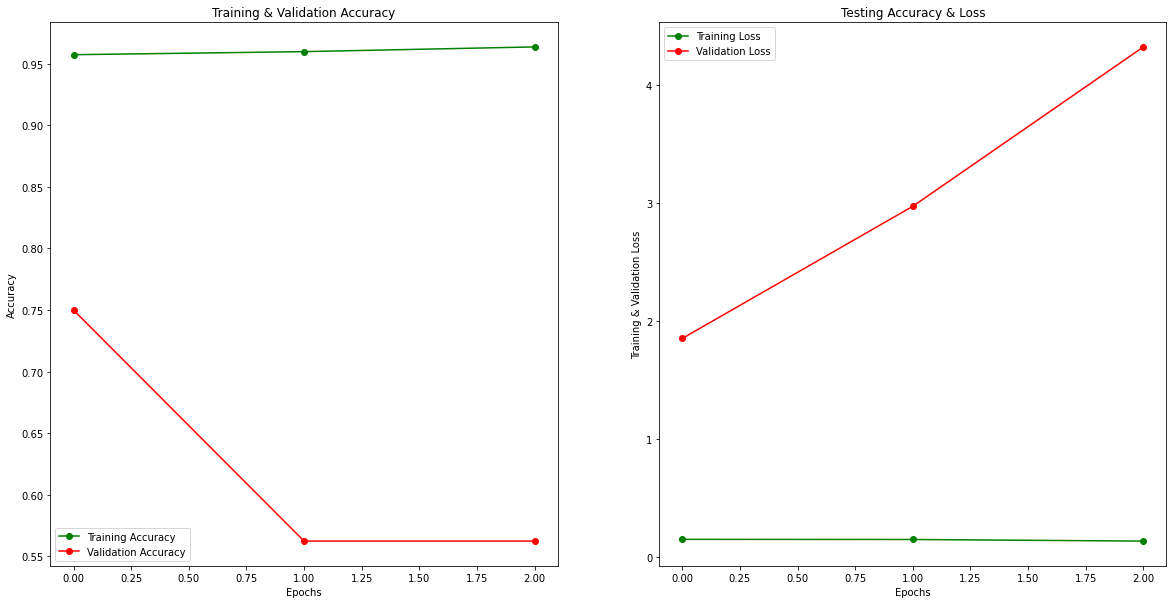

In [37]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = sequential_model.history['accuracy']
train_loss = sequential_model.history['loss']
val_acc = sequential_model.history['val_accuracy']
val_loss = sequential_model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [47]:
print("Loss of the model is :" , seq_model.evaluate(test_set)[0])
print("Accuracy of the model is :" , seq_model.evaluate(test_set)[1]*100)

63/63 [==============================] - 7s 111ms/step - loss: 2.1924 - accuracy: 0.8237
Loss of the model is : 2.192368745803833
63/63 [==============================] - 7s 108ms/step - loss: 2.1924 - accuracy: 0.8237
Accuracy of the model is : 82.37179517745972


# Vgg16

In [39]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  

# Freeze convolutional layers
for layer in vgg16_model.layers:
    layer.trainable = False  

NN_transfer_vgg16 = Sequential(
                        [InputLayer(input_shape=(224,224,3)),vgg16_model,
                         Flatten(),  # should be fine , or add layers
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),   
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(2, activation='sigmoid')]
                       )

NN_transfer_vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [70]:
vgg16_model = NN_transfer_vgg16.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set) 
)

Epoch 1/20
522/522 [==============================] - 119s 228ms/step - loss: 0.0748 - accuracy: 0.9734 - val_loss: 0.1520 - val_accuracy: 0.9375
Epoch 2/20
522/522 [==============================] - 118s 226ms/step - loss: 0.0627 - accuracy: 0.9783 - val_loss: 0.1573 - val_accuracy: 0.8750
Epoch 3/20
522/522 [==============================] - 118s 227ms/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 0.1432 - val_accuracy: 0.9375
Epoch 4/20
522/522 [==============================] - 118s 226ms/step - loss: 0.0606 - accuracy: 0.9760 - val_loss: 0.1449 - val_accuracy: 0.9375
Epoch 5/20
522/522 [==============================] - 118s 226ms/step - loss: 0.0607 - accuracy: 0.9785 - val_loss: 0.1767 - val_accuracy: 0.9375
Epoch 6/20
522/522 [==============================] - 118s 226ms/step - loss: 0.0609 - accuracy: 0.9774 - val_loss: 0.4524 - val_accuracy: 0.8750
Epoch 7/20
522/522 [==============================] - 118s 226ms/step - loss: 0.0576 - accuracy: 0.9783 - val_loss: 0.2355 -

# Analysis after Model Training

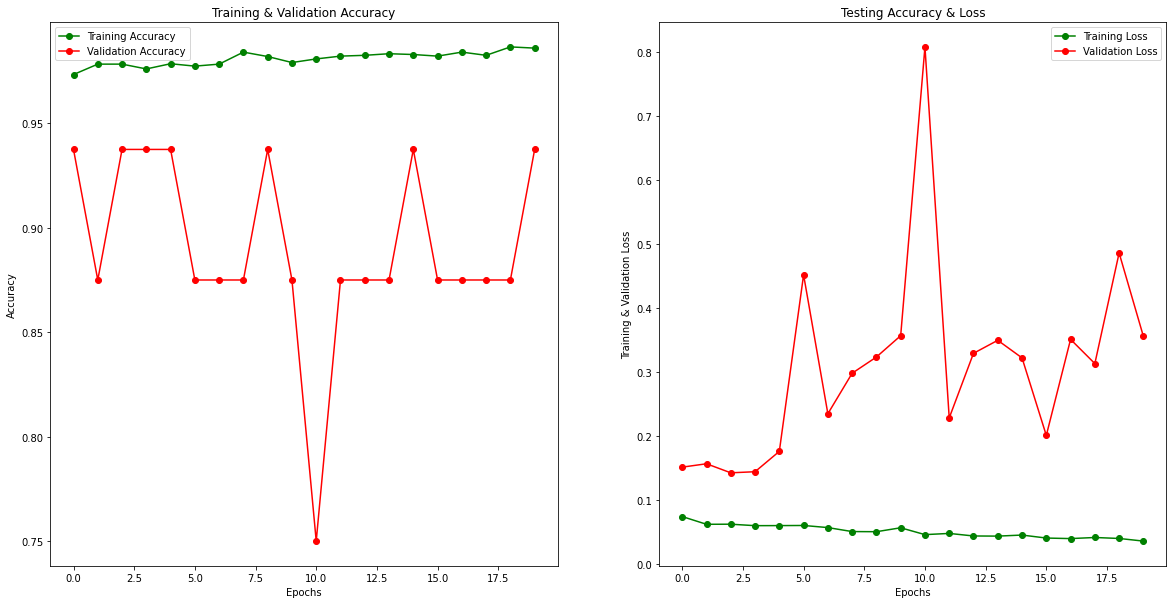

In [71]:
epochs = [i for i in range((20))]
fig , ax = plt.subplots(1,2)
train_acc = vgg16_model.history['accuracy']
train_loss = vgg16_model.history['loss']
val_acc = vgg16_model.history['val_accuracy']
val_loss = vgg16_model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [72]:
print("Loss of the model is :" , NN_transfer_vgg16.evaluate(test_set)[0])
print("Accuracy of the model is :" , NN_transfer_vgg16.evaluate(test_set)[1]*100)

63/63 [==============================] - 7s 117ms/step - loss: 0.3533 - accuracy: 0.9151
Loss of the model is : 0.3533192574977875
63/63 [==============================] - 7s 117ms/step - loss: 0.3533 - accuracy: 0.9151
Accuracy of the model is : 91.50640964508057


# Vgg19

In [66]:
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  

# Freeze convolutional layers
for layer in vgg19_model.layers:
    layer.trainable = False  

NN_transfer_vgg19 = Sequential(
                        [InputLayer(input_shape=(224,224,3)),vgg19_model,
                         Flatten(),  # should be fine , or add layers
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),
                         Dense(32, activation='relu'),   # 2 dense is must bcuz VGG16 model Conv2D twice and Maxpooling -> get a lot more features
                         Dense(2, activation='sigmoid')]
                       )

NN_transfer_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [67]:
vgg19_model = NN_transfer_vgg19.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set), callbacks=[callbacks]
)

Epoch 1/20
522/522 [==============================] - 121s 231ms/step - loss: 0.2023 - accuracy: 0.9214 - val_loss: 0.2438 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/20
522/522 [==============================] - 119s 228ms/step - loss: 0.1391 - accuracy: 0.9450 - val_loss: 0.3247 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
522/522 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9503Restoring model weights from the end of the best epoch: 1.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
522/522 [==============================] - 119s 229ms/step - loss: 0.1272 - accuracy: 0.9503 - val_loss: 0.3843 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 00003: early stopping


# Analysis after Model Training

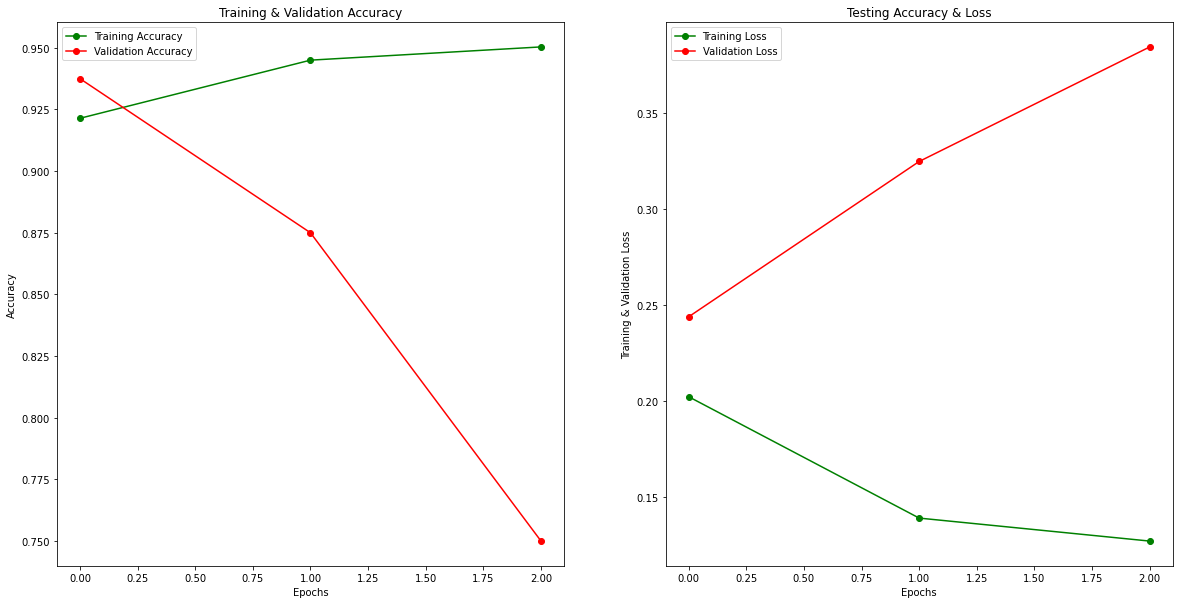

In [68]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = vgg19_model.history['accuracy']
train_loss = vgg19_model.history['loss']
val_acc = vgg19_model.history['val_accuracy']
val_loss = vgg19_model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [69]:
print("Loss of the model is :" , NN_transfer_vgg19.evaluate(test_set)[0])
print("Accuracy of the model is :" , NN_transfer_vgg19.evaluate(test_set)[1]*100)

63/63 [==============================] - 8s 118ms/step - loss: 0.2387 - accuracy: 0.9183
Loss of the model is : 0.23867709934711456
63/63 [==============================] - 8s 118ms/step - loss: 0.2387 - accuracy: 0.9183
Accuracy of the model is : 91.82692170143127


# MobileNetV2

In [56]:
MobileV2_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
for layer in MobileV2_model.layers:
    layer.trainable = False    

x = MobileV2_model.output
x = Flatten()(x) 
x = Dense(100, activation='relu')(x) 
x = Dense(50, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x) 

MobileV2_model = Model(inputs=MobileV2_model.input, outputs=predictions)
MobileV2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
MobileV2_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [57]:
MobileV2model = MobileV2_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set), callbacks=[callbacks]
)

Epoch 1/20
522/522 [==============================] - 112s 211ms/step - loss: 0.3284 - accuracy: 0.9296 - val_loss: 0.1379 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/20
522/522 [==============================] - 110s 210ms/step - loss: 0.1154 - accuracy: 0.9590 - val_loss: 0.1762 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
522/522 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9574Restoring model weights from the end of the best epoch: 1.

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
522/522 [==============================] - 110s 210ms/step - loss: 0.1369 - accuracy: 0.9574 - val_loss: 0.3301 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 00003: early stopping


# Analysis after Model Training

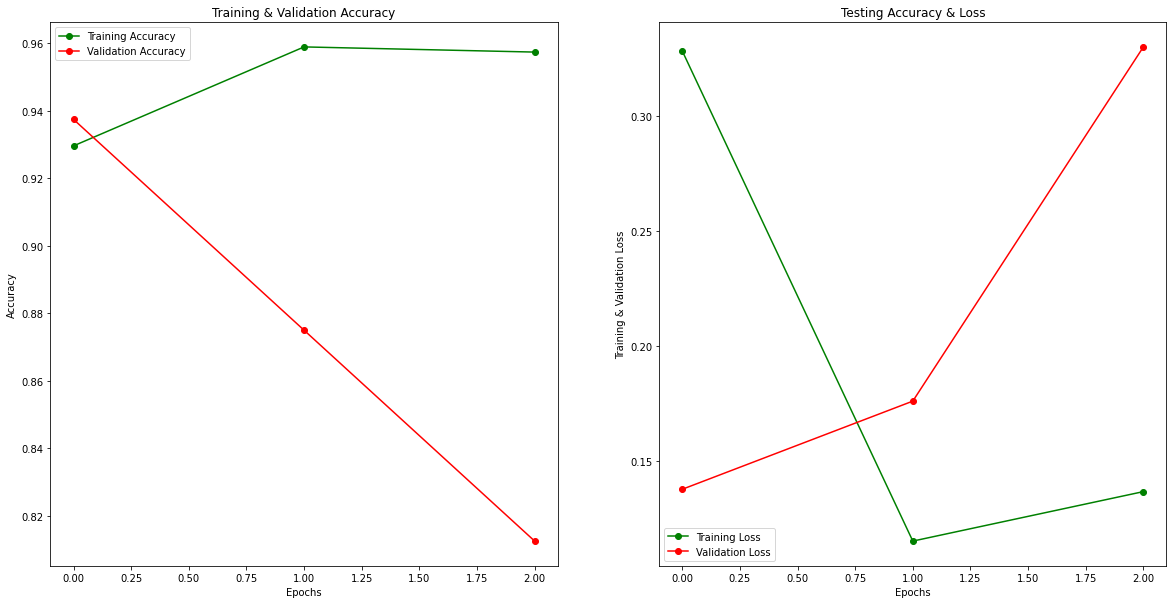

In [58]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = MobileV2model.history['accuracy']
train_loss = MobileV2model.history['loss']
val_acc = MobileV2model.history['val_accuracy']
val_loss = MobileV2model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [25]:
test_accu = MobileV2_model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100)

The testing accuracy is : 85.41666865348816


In [59]:
print("Loss of the model is :" , MobileV2_model.evaluate(test_set)[0])
print("Accuracy of the model is :" , MobileV2_model.evaluate(test_set)[1]*100)

63/63 [==============================] - 7s 111ms/step - loss: 0.2292 - accuracy: 0.9183
Loss of the model is : 0.22923454642295837
63/63 [==============================] - 7s 112ms/step - loss: 0.2292 - accuracy: 0.9183
Accuracy of the model is : 91.82692170143127


# InceptionV3

In [60]:
inceptV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  

# Freeze convolutional layers
for layer in inceptV3_model.layers:
    layer.trainable = False  

NN_transfer_V3 = Sequential(
                        [InputLayer(input_shape=(224,224,3)),inceptV3_model,
                         Flatten(),  
                         Dense(128, activation='relu'),
                         Dense(64, activation='relu'),   
                         Dense(32, activation='relu'),   
                         Dense(2, activation='sigmoid')]
                       )

NN_transfer_V3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)
inceptV3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_99 (Conv2D)             (None, 111, 111, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_99 (BatchN  (None, 111, 111, 32  96         ['conv2d_99[0][0]']              
 ormalization)                  )                                                      

In [62]:
inceptV3_model = NN_transfer_V3.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set), callbacks=[callbacks]
)

Epoch 1/20
522/522 [==============================] - 123s 228ms/step - loss: 0.3454 - accuracy: 0.9053 - val_loss: 0.5770 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/20
522/522 [==============================] - 118s 227ms/step - loss: 0.1666 - accuracy: 0.9383 - val_loss: 0.2419 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/20
522/522 [==============================] - 119s 227ms/step - loss: 0.1461 - accuracy: 0.9467 - val_loss: 0.3694 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/20
522/522 [==============================] - ETA: 0s - loss: 0.1382 - accuracy: 0.9530Restoring model weights from the end of the best epoch: 2.

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
522/522 [==============================] - 118s 226ms/step - loss: 0.1382 - accuracy: 0.9530 - val_loss: 0.4803 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 00004: early stopping


# Analysis after Model Training

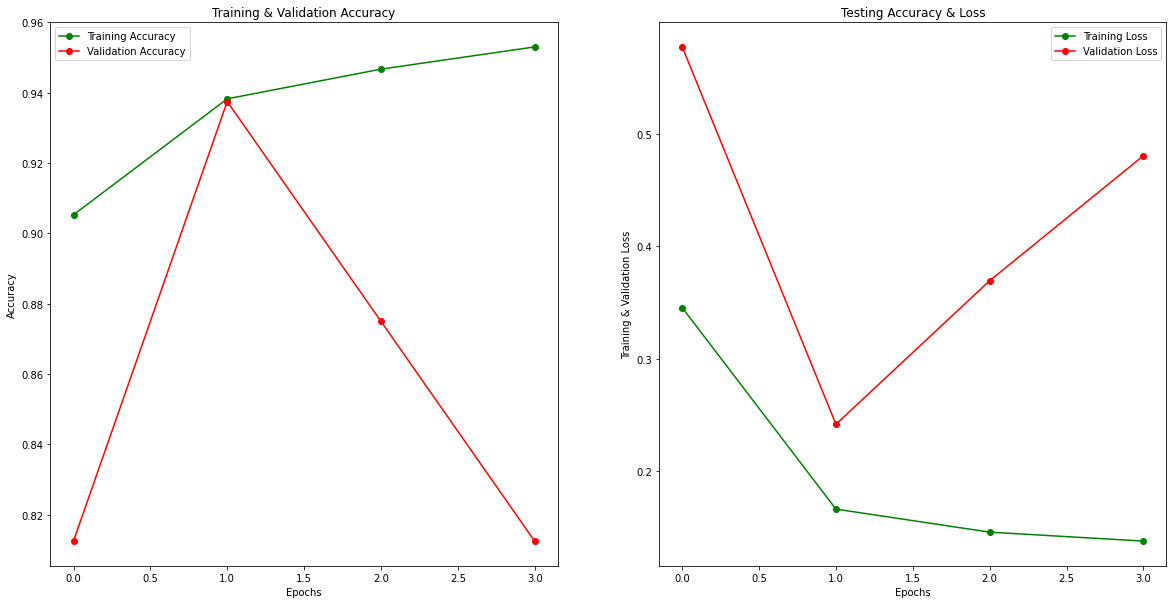

In [63]:
epochs = [i for i in range(4)]
fig , ax = plt.subplots(1,2)
train_acc = inceptV3_model.history['accuracy']
train_loss = inceptV3_model.history['loss']
val_acc = inceptV3_model.history['val_accuracy']
val_loss = inceptV3_model.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [65]:
print("Loss of the model is :" , NN_transfer_V3.evaluate(test_set)[0])
print("Accuracy of the model is :" , NN_transfer_V3.evaluate(test_set)[1]*100)

63/63 [==============================] - 8s 121ms/step - loss: 0.3571 - accuracy: 0.8702
Loss of the model is : 0.3570813238620758
63/63 [==============================] - 8s 120ms/step - loss: 0.3571 - accuracy: 0.8702
Accuracy of the model is : 87.0192289352417
